<a href="https://colab.research.google.com/github/ijinshes2ly/FLORdeMAN_CBA_strategy/blob/main/FLORdeMAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

#1csv df로 저장
df = pd.read_csv('꽃을 든 남자_고객행동분석.csv')

#2. csv 파일 확인 후 범주형 데이터 변환
#컬럼의 범주 갯수 파악 위해 unique() 사용
df['상품 카테고리'].unique()
df['유입된 마케팅 채널'].unique()

#원핫인코딩
df["상품 카테고리"] = df["상품 카테고리"].map({'Skincare' :0, 'Haircare':1, 'Fragrance':2, 'Bodycare':3})
df["유입된 마케팅 채널"] = df["유입된 마케팅 채널"].map({'YouTube':0, 'Facebook':1, 'Email':2, 'Instagram':3, 'Website':4})
df["성별"] = df["성별"].map({'Female': 0, 'Male':1})

#결측치 찾기
missing_values_example = df.isnull()

# 결측값 각 컬럼의 평균으로 채우기 # 평균은 항상 float 값을 반환
df.fillna(df.mean(numeric_only = True),inplace =True)

display(df)
print(df.dtypes)


,고객ID,나이,성별,상품 카테고리,구매 금액(원),구매 빈도,제품 리뷰 평점,반품률,유입된 마케팅 채널,쿠폰 사용 여부
0,1,56,0,0,72559.21,18.000000,3.056818,0.43,0,0
1,2,46,0,1,81902.60,13.000000,2.000000,0.11,0,0
2,3,32,1,2,38123.27,7.000000,1.000000,0.48,1,0
3,4,60,1,0,14136.77,4.000000,2.000000,0.01,2,0
4,5,25,1,0,94349.71,9.511111,1.000000,0.48,3,0
...,...,...,...,...,...,...,...,...,...,...
95,96,24,1,3,17979.03,12.000000,4.000000,0.07,2,0
96,97,26,0,3,72346.54,3.000000,4.000000,0.01,3,0
97,98,41,0,1,57517.90,1.000000,3.056818,0.18,3,0
98,99,18,1,3,33168.46,1.000000,3.000000,0.29,4,0


고객ID            int64
나이              int64
성별              int64
상품 카테고리         int64
구매 금액(원)      float64
구매 빈도         float64
제품 리뷰 평점      float64
반품률           float64
유입된 마케팅 채널      int64
쿠폰 사용 여부        int64
dtype: object


In [ ]:
#3질문 설정을 위한 상관계수 구하기

#종속변수 설정
target_variable = "구매 금액(원)"

#상관계수 계산
correlation_matrix = df.corr()

#종속변수와의 상관계수 추출(자기자신제외)
independent_variables = correlation_matrix[target_variable].drop(target_variable).sort_values(ascending=False)

##결과출력
display("구매 금액과의 상관계수:", independent_variables)

#카테고리별 구매자 수, 남자 구매자 수(시각화할 때 숫자를 문자로 바꿔야해서)
print(df["상품 카테고리"].value_counts())
print(df.groupby("상품 카테고리")["성별"].sum())


'구매 금액과의 상관계수:'

,구매 금액(원)
성별,0.161651
구매 빈도,0.109970
제품 리뷰 평점,0.106362
나이,0.062974
상품 카테고리,0.033358
유입된 마케팅 채널,-0.026266
반품률,-0.038881
고객ID,-0.153955
쿠폰 사용 여부,-0.181660


상품 카테고리
0    27
3    27
1    24
2    22
Name: count, dtype: int64
상품 카테고리
0    18
1    10
2    12
3    16
Name: 성별, dtype: int64


전반적으로 구매 금액과 상관관계가 높지는 않음.
양의 상관관계를 갖는 성별, 제품리뷰 평점, 구매빈도, 나이, 상품 카테고리의 특징을 가지고 질문을 생성.
1. 성별-상품 카테고리 : 막대 x카테고리 y성별
2. 평점-구매빈도: 산점도 x평점 y 매빈도
3.나이-상품카테고리 : 막대 x상품 y나이

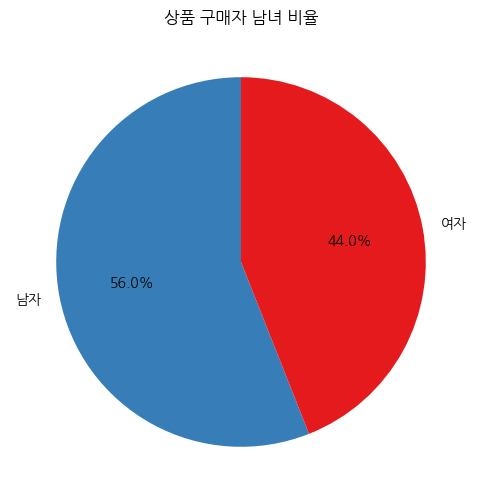

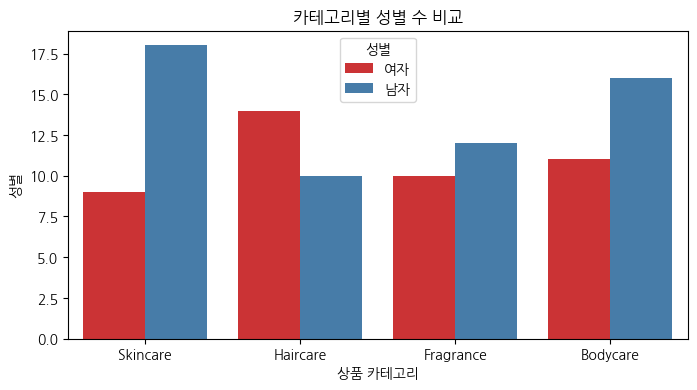

<ipython-input-28-bc0852fe7864>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="나이대", data=df, width=0.6, order=labels,  palette="Set1")


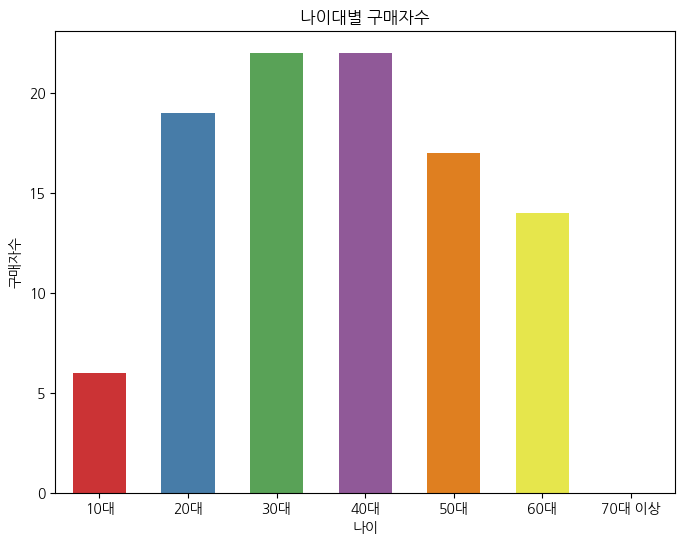

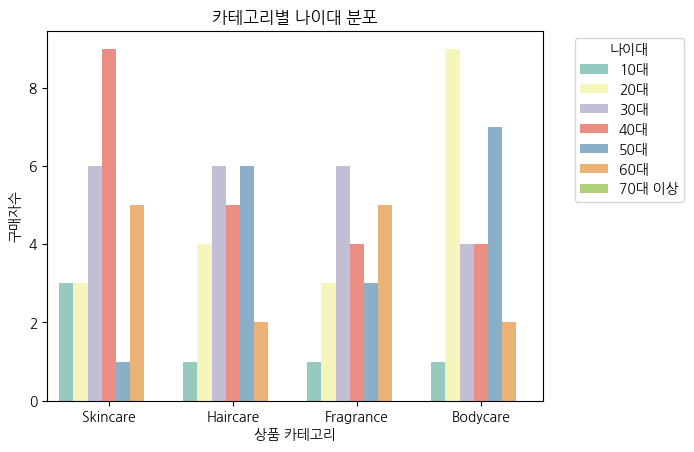

<ipython-input-28-bc0852fe7864>:57: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="제품 리뷰 평점", y="구매 빈도", data=df,palette="Set2")


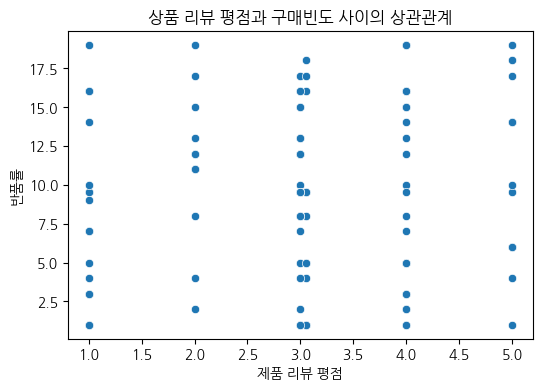

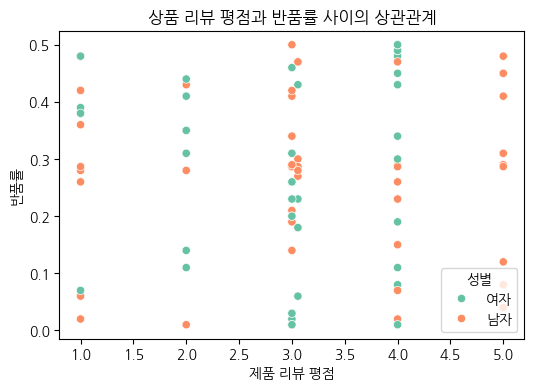

In [ ]:
#4시각화
import matplotlib.pyplot as plt
import seaborn as sns
!pip install koreanize-matplotlib
import koreanize_matplotlib

#구매자 성비율
gender_counts = df["성별"].value_counts()
plt.figure(figsize=(6, 6))  # 그래프 크기 조정
set1_colors = list(sns.color_palette("Set1", n_colors=len(gender_counts)))[::-1]
plt.pie(
    gender_counts, labels=gender_counts.index, autopct="%1.1f%%",
    colors=set1_colors, startangle=90
)
plt.title("상품 구매자 남녀 비율")
plt.show()

#카테고리별 성별 수
df["상품 카테고리"]=df["상품 카테고리"].replace([0,1,2,3],['Skincare', 'Haircare', 'Fragrance', 'Bodycare'])
df["성별"] = df["성별"].replace([0,1],["여자","남자"])
plt.figure(figsize=(8, 4))

sns.countplot(x="상품 카테고리", data=df, hue ="성별",palette='Set1')
plt.title("카테고리별 성별 수 비교")
plt.xlabel("상품 카테고리")
plt.ylabel("성별")
plt.show()

#나이대별 구매자 수
bins = [9, 19, 29, 39, 49, 59, 69, 100]
labels = ["10대", "20대", "30대", "40대", "50대", "60대", "70대 이상"]
df["나이대"] = pd.cut(df["나이"], bins=bins, labels=labels, right=True)
plt.figure(figsize=(8, 6))
sns.countplot(x="나이대", data=df, width=0.6, order=labels,  palette="Set1")
plt.title("나이대별 구매자수")
plt.xlabel("나이")
plt.ylabel("구매자수")
plt.show()

# 상품카테고리별 나이대 분포
age_group_counts = df["나이대"].value_counts().sort_index()
sns.countplot(x="상품 카테고리", data=df, hue="나이대", palette="Set3")
plt.figsize=(14, 14)
plt.title("카테고리별 나이대 분포")
plt.xlabel("상품 카테고리")
plt.ylabel("구매자수")
plt.legend(title="나이대", bbox_to_anchor=(1.05, 1), loc="upper left")# 범례 추가
plt.show()

#상품 리뷰 평점과 구매 빈도사이의 상관관계
plt.figure(figsize=(6, 4))
sns.scatterplot(x="제품 리뷰 평점", y="구매 빈도", data=df,palette="Set2")
plt.title("상품 리뷰 평점과 구매빈도 사이의 상관관계")
plt.xlabel("제품 리뷰 평점")
plt.ylabel("반품률")
plt.show()

#상품 리뷰 평점과 반품률 사이의 상관관계
plt.figure(figsize=(6, 4))
sns.scatterplot(x="제품 리뷰 평점", y="반품률", data=df, hue="성별", palette="Set2")
plt.title("상품 리뷰 평점과 반품률 사이의 상관관계")
plt.xlabel("제품 리뷰 평점")
plt.ylabel("반품률")
plt.show()




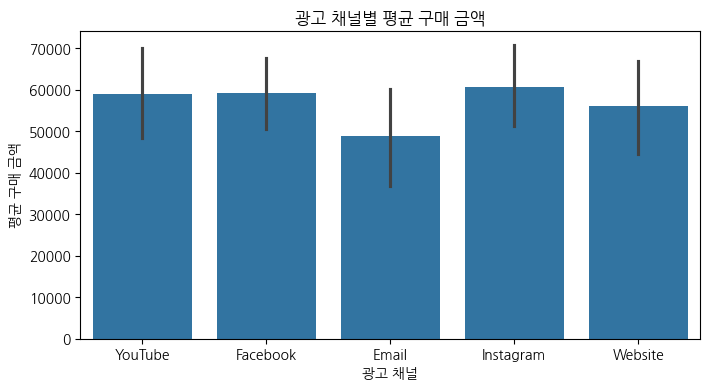

,구매 금액(원)
유입된 마케팅 채널,
Email,48762.6
Facebook,59239.5
Instagram,60758.5
Website,56134.8
YouTube,59071.5


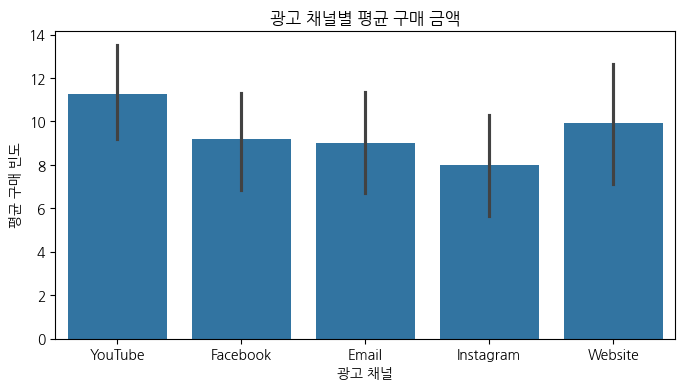

,구매 빈도
유입된 마케팅 채널,
Email,9.0
Facebook,9.2
Instagram,8.0
Website,9.9
YouTube,11.3


In [ ]:
#광고 채널별 평균 구매 금액(ROI)
meanvalue_pay= df.groupby("유입된 마케팅 채널")["구매 금액(원)"].mean()
df["유입된 마케팅 채널"]=df["유입된 마케팅 채널"].replace([0,1,2,3,4],['YouTube', 'Facebook', 'Email', 'Instagram', 'Website'])
plt.figure(figsize=(8, 4))
sns.barplot(x=df["유입된 마케팅 채널"], y=df["구매 금액(원)"], estimator=np.mean)
plt.title("광고 채널별 평균 구매 금액")
plt.xlabel("광고 채널")
plt.ylabel("평균 구매 금액")
plt.show()
display(meanvalue.round(1))

#채널별 평균 구매 빈도
meanvalue_frequency= df.groupby("유입된 마케팅 채널")["구매 빈도"].mean()
plt.figure(figsize=(8, 4))
sns.barplot(x=df["유입된 마케팅 채널"], y=df["구매 빈도"], estimator=np.mean)
plt.title("광고 채널별 평균 구매 금액")
plt.xlabel("광고 채널")
plt.ylabel("평균 구매 빈도")
plt.show()
display(meanvalue_frequency.round(1))
